# Spotify Song Prediction
Audio features of 160k+ songs released in between 1921 and 2020 Perform time-series analysis.

# Task 1

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import plotly.express as px
import seaborn as sns


%matplotlib inline



In [2]:
data1= pd.read_csv("W:\intern min project\spotify_data\data.csv",)

In [3]:
data1.shape

(169909, 19)

Data contains nearly 170,000 songs with 19 different features columns. The features include the song name, artist, release date,etc. 

In [4]:
data1.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [5]:
data1.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

check is there any missing value

In [6]:
data1.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

delete unwanted column

In [7]:
data1.drop(["key", "mode", "explicit", "release_date"], axis=1, inplace=True)

In [8]:
data1.head()

,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,6KbQ3uYMLKb5jDxLF7wYDD,0.563,0.1510,-12.428,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,6KuQTIu1KoTTkLXKrwlLPV,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,6L63VW0PibdM1HDSBoqnoM,0.000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,6M94FkXd15sOAOQYRnWPN8,0.887,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,6N6tiFZ9vLTSOIxkj8qKrd,0.908,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928


In [9]:
year_avg = data1[["acousticness","danceability","energy", "instrumentalness","liveness",
                  "tempo", "valence", "loudness", "speechiness", "year"]].\
groupby("year").mean().sort_values(by="year").reset_index()

In [10]:
year_avg.head()

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness
0,1921,0.895823,0.425661,0.236784,0.322330,0.215814,100.397758,0.425495,-17.095438,0.077258
1,1922,0.939236,0.480000,0.237026,0.440470,0.238647,101.376139,0.534056,-19.179958,0.115419
2,1923,0.976329,0.568462,0.246936,0.401932,0.236656,112.456598,0.624788,-14.373882,0.098619
3,1924,0.935575,0.548654,0.347033,0.583955,0.237875,120.653359,0.668574,-14.202304,0.090210
4,1925,0.965422,0.571890,0.264373,0.408893,0.243094,115.671715,0.616430,-14.516707,0.115457


# Trends of song over the course of a cntury

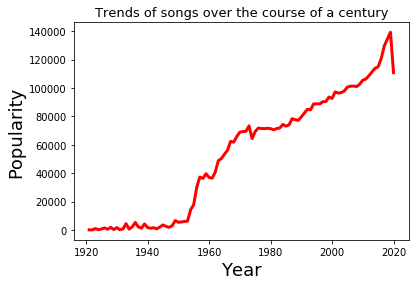

In [11]:
year_tnd = data1.groupby(['year'], as_index=False)
popularity_track = year_tnd[['name', 'popularity']].sum()
song_count = year_tnd['name'].count()


fig, ax1 = plt.subplots()
#Trending song
ax1.plot(popularity_track.year, popularity_track.popularity, color='red', linewidth=3,)
ax1.set_title('Trends of songs over the course of a century', fontsize=13)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Popularity', color='black', fontsize=18)

plt.show()

# Top Ten Artist

In [12]:
data1["artists"].value_counts()[:10]

['Эрнест Хемингуэй']      1215
['Francisco Canaro']       938
['Эрих Мария Ремарк']      781
['Ignacio Corsini']        620
['Frank Sinatra']          592
['Bob Dylan']              539
['The Rolling Stones']     512
['Johnny Cash']            502
['The Beach Boys']         491
['Elvis Presley']          488
Name: artists, dtype: int64

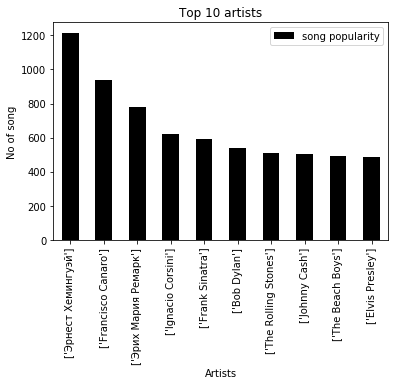

In [13]:
Top10 = pd.DataFrame({'song popularity':data1['artists'].value_counts().head(10)})
Top10.plot.bar(color='black')
plt.title('Top 10 artists')
plt.xlabel('Artists')
plt.ylabel('No of song')
plt.show()
